# This is Big Query Tutorial Demonstration

In [1]:
import os
import pandas as pd
from bq_helper import BigQueryHelper

''' Setting the json file path '''
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/home/luckypigeon/Desktop/InformationSystem/NSMG-387aa858e987.json"

## Big Query Introduction (Reference from [here](https://www.kaggle.com/sohier/introduction-to-the-bq-helper-package))

In [2]:
bq_assistant = BigQueryHelper("bigquery-public-data", "openaq")

### 列出 Dataset 的所有資料表

In [3]:
bq_assistant.list_tables()

['global_air_quality']

### 列出資料表 Schema

In [5]:
bq_assistant.table_schema("global_air_quality")

,name,type,mode,description
0,location,STRING,NULLABLE,Location where data was measured
1,city,STRING,NULLABLE,City containing location
2,country,STRING,NULLABLE,Country containing measurement in 2 letter ISO...
3,pollutant,STRING,NULLABLE,Name of the Pollutant being measured. Allowed ...
4,value,FLOAT,NULLABLE,Latest measured value for the pollutant
5,timestamp,TIMESTAMP,NULLABLE,The datetime at which the pollutant was measur...
6,unit,STRING,NULLABLE,The unit the value was measured in coded by UC...
7,source_name,STRING,NULLABLE,Name of the source of the data
8,latitude,FLOAT,NULLABLE,Latitude in decimal degrees. Precision >3 deci...
9,longitude,FLOAT,NULLABLE,Longitude in decimal degrees. Precision >3 dec...


### 列出前幾筆資料 (參數為 arg1 = {table_name}, arg2 = {number_of_rows_you_want_to_list})

In [4]:
bq_assistant.head('global_air_quality', num_rows=3)

,location,city,country,pollutant,value,timestamp,unit,source_name,latitude,longitude,averaged_over_in_hours
0,"BTM Layout, Bengaluru - KSPCB",Bengaluru,IN,co,910.00,2018-02-22 03:00:00+00:00,µg/m³,CPCB,12.912811,77.60922,0.25
1,"BTM Layout, Bengaluru - KSPCB",Bengaluru,IN,no2,131.87,2018-02-22 03:00:00+00:00,µg/m³,CPCB,12.912811,77.60922,0.25
2,"BTM Layout, Bengaluru - KSPCB",Bengaluru,IN,o3,15.57,2018-02-22 03:00:00+00:00,µg/m³,CPCB,12.912811,77.60922,0.25


In [6]:
QUERY = "SELECT location, timestamp, pollutant FROM `bigquery-public-data.openaq.global_air_quality`"

### 算 query 大小 (以 GB 為單位，大約 0.6 MB）

In [7]:
bq_assistant.estimate_query_size(QUERY)

0.0006457120180130005

### 將 Big Query 轉為 Pandas Dataframe

In [8]:
df = bq_assistant.query_to_pandas(QUERY)

In [9]:
df.head(3)

,location,timestamp,pollutant
0,"BTM Layout, Bengaluru - KSPCB",2018-02-22 03:00:00+00:00,co
1,"BTM Layout, Bengaluru - KSPCB",2018-02-22 03:00:00+00:00,no2
2,"BTM Layout, Bengaluru - KSPCB",2018-02-22 03:00:00+00:00,o3


### Big Query to Pandas Dataframe 安全模式 (預設 1 GB 自動斷開)

In [10]:
df = bq_assistant.query_to_pandas_safe(QUERY)

## Github Repo Dataset

In [11]:
bq_assistant = BigQueryHelper("bigquery-public-data", "github_repos")

In [12]:
%%time
bq_assistant.list_tables()

CPU times: user 64.5 ms, sys: 0 ns, total: 64.5 ms
Wall time: 1.05 s


['commits',
 'contents',
 'files',
 'languages',
 'licenses',
 'sample_commits',
 'sample_contents',
 'sample_files',
 'sample_repos']

In [14]:
%%time
bq_assistant.table_schema("sample_repos")

CPU times: user 15 ms, sys: 0 ns, total: 15 ms
Wall time: 275 ms


,name,type,mode,description
0,repo_name,STRING,NULLABLE,None
1,watch_count,INTEGER,NULLABLE,None


In [26]:
bq_assistant.head("sample_repos", num_rows=5)

,repo_name,watch_count
0,FreeCodeCamp/FreeCodeCamp,90457
1,firehol/netdata,13208
2,joshbuchea/HEAD,13125
3,braydie/HowToBeAProgrammer,12019
4,sindresorhus/awesome,11063


In [27]:
QUERY = """
        SELECT *
        FROM `bigquery-public-data.github_repos.sample_repos`
        """

### 大約 12 MB

In [28]:
%%time
bq_assistant.estimate_query_size(QUERY)

CPU times: user 5.1 ms, sys: 454 µs, total: 5.55 ms
Wall time: 3.57 s


0.012228592298924923

### 將 License 轉為 Dataframe (Column 分別為 license, count)

In [29]:
QUERY = """
        SELECT license, COUNT(*) AS count
        FROM `bigquery-public-data.github_repos.licenses`
        GROUP BY license
        ORDER BY COUNT(*) DESC
        """

In [30]:
%%time
license_df = bq_assistant.query_to_pandas_safe(QUERY)

CPU times: user 48.8 ms, sys: 262 µs, total: 49.1 ms
Wall time: 4.9 s


### 將 Sample_repos 轉為 Dataframe (Column 分別為 repo_name, watch_count)

In [31]:
QUERY = """
        SELECT repo_name, watch_count
        FROM `bigquery-public-data.github_repos.sample_repos`
        ORDER BY watch_count DESC
        """

In [32]:
%%time
repos_df = bq_assistant.query_to_pandas_safe(QUERY)

CPU times: user 3.13 s, sys: 144 ms, total: 3.28 s
Wall time: 25.9 s


In [33]:
print('Size of license dataframe: {} Bytes'.format(int(license_df.memory_usage(index=True, deep=True).sum())))
print('Size of sample repos dataframe: {} Bytes'.format(int(repos_df.memory_usage(index=True, deep=True).sum())))

Size of license dataframe: 1175 Bytes
Size of sample repos dataframe: 35130431 Bytes


In [34]:
license_df.head()

,license,count
0,mit,1709588
1,apache-2.0,493617
2,gpl-2.0,345372
3,gpl-3.0,343403
4,bsd-3-clause,152797


In [35]:
repos_df.head()

,repo_name,watch_count
0,FreeCodeCamp/FreeCodeCamp,90457
1,firehol/netdata,13208
2,joshbuchea/HEAD,13125
3,braydie/HowToBeAProgrammer,12019
4,sindresorhus/awesome,11063


In [36]:
license_df.shape

(15, 2)

In [37]:
repos_df.shape

(400000, 2)

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

### Plot license-count image

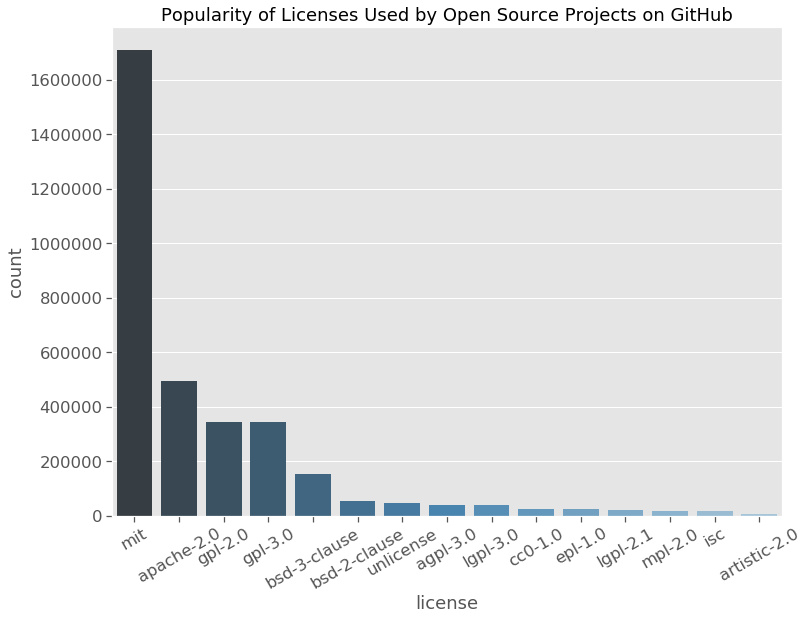

In [39]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

f, g = plt.subplots(figsize=(12, 9))
g = sns.barplot(x="license", y="count", data=license_df, palette="Blues_d")
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.title("Popularity of Licenses Used by Open Source Projects on GitHub")
plt.show(g)

### Plot repo_name-watch_count image
* palette value could be:<br>
Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

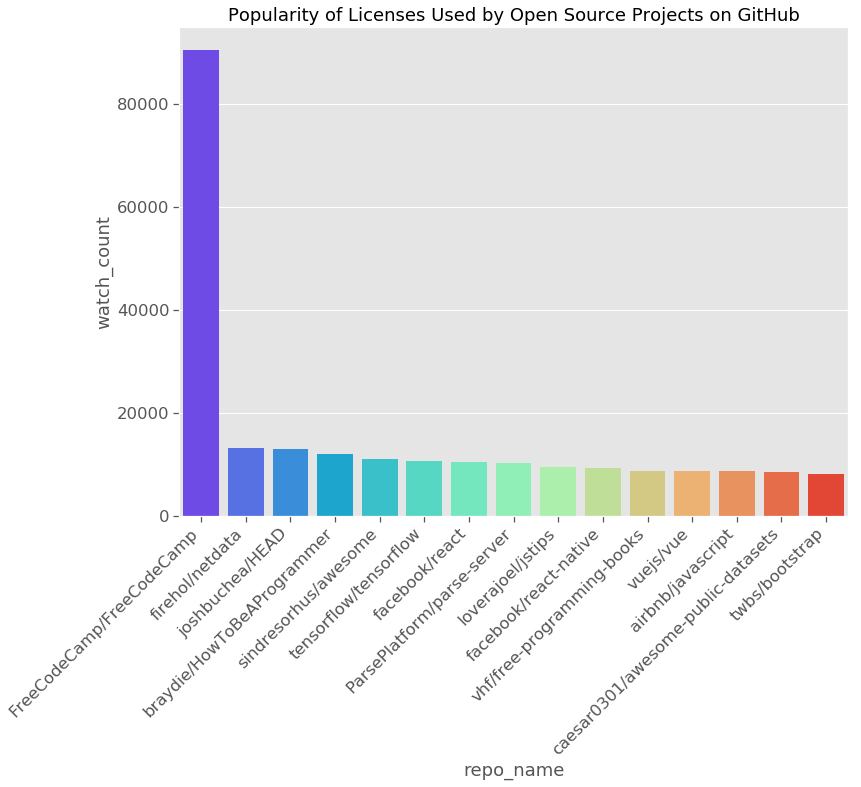

In [50]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3.5})

f, g = plt.subplots(figsize=(12, 9))
g = sns.barplot(x="repo_name", y="watch_count", data=repos_df.head(15), palette="rainbow")
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha='right')
plt.title("Popularity of Licenses Used by Open Source Projects on GitHub")
plt.show(g)